In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Use the print() function to display the latitude and longitude combinations.
#for coordinate in coordinates:
    #print(coordinate[0], coordinate[1])

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

588

In [11]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

    # Loop through all the cities in the list.
for i, city in enumerate(cities):

        # Group cities in sets of 50 for logging purposes.
        if (i % 50 == 0 and i >= 50):
            set_count += 1
            record_count = 1
            time.sleep(60)

        # Create endpoint URL with each city.
        city_url = url + "&q=" + city.replace(" ","+")
        #print(city_url)
        # Log the URL, record, and set numbers and the city.
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
        # Add 1 to the record count.
        record_count += 1

        # Run an API request for each of the cities.
        try:
            # Parse the JSON and retrieve data.
            city_weather = requests.get(city_url).json()
            # Parse out the needed data.
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            # Convert the date to ISO standard.
            city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            # Append the city information into city_data list.
            city_data.append({"City": city.title(),
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})

     #If an error is experienced, skip the city.
        except:
            print("City not found. Skipping...")
            pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | victoria
Processing Record 2 of Set 1 | puerto del rosario
Processing Record 3 of Set 1 | moranbah
Processing Record 4 of Set 1 | ixtapa
Processing Record 5 of Set 1 | vestmannaeyjar
Processing Record 6 of Set 1 | los llanos de aridane
Processing Record 7 of Set 1 | ijaki
City not found. Skipping...
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | maymyo
Processing Record 11 of Set 1 | erenhot
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | tibati
Processing Record 14 of Set 1 | chuy
Processing Record 15 of Set 1 | bengkulu
Processing Record 16 of Set 1 | faanui
Processing Record 17 of Set 1 | hasaki
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | san jose
Processing Record 21 of Set 1 | launceston
Processing Record 22 of Set 1 | bredasdorp
Pr

Processing Record 36 of Set 4 | saint-augustin
Processing Record 37 of Set 4 | norman wells
Processing Record 38 of Set 4 | huarmey
Processing Record 39 of Set 4 | bocas del toro
Processing Record 40 of Set 4 | moba
Processing Record 41 of Set 4 | tura
Processing Record 42 of Set 4 | mar del plata
Processing Record 43 of Set 4 | vagur
Processing Record 44 of Set 4 | puri
Processing Record 45 of Set 4 | batagay-alyta
Processing Record 46 of Set 4 | inuvik
Processing Record 47 of Set 4 | te anau
Processing Record 48 of Set 4 | ribeira grande
Processing Record 49 of Set 4 | suez
Processing Record 50 of Set 4 | skagastrond
City not found. Skipping...
Processing Record 1 of Set 5 | muros
Processing Record 2 of Set 5 | abu samrah
Processing Record 3 of Set 5 | namatanai
Processing Record 4 of Set 5 | honiara
Processing Record 5 of Set 5 | ahipara
Processing Record 6 of Set 5 | clarence town
Processing Record 7 of Set 5 | padang
Processing Record 8 of Set 5 | bathsheba
Processing Record 9 of 

Processing Record 26 of Set 8 | changping
Processing Record 27 of Set 8 | yirol
City not found. Skipping...
Processing Record 28 of Set 8 | bubaque
Processing Record 29 of Set 8 | rio gallegos
Processing Record 30 of Set 8 | obsharovka
Processing Record 31 of Set 8 | karmana
City not found. Skipping...
Processing Record 32 of Set 8 | harper
Processing Record 33 of Set 8 | husavik
Processing Record 34 of Set 8 | santiago del estero
Processing Record 35 of Set 8 | russell
Processing Record 36 of Set 8 | leh
Processing Record 37 of Set 8 | mayo
Processing Record 38 of Set 8 | paita
Processing Record 39 of Set 8 | lisala
Processing Record 40 of Set 8 | emerald
Processing Record 41 of Set 8 | koutiala
Processing Record 42 of Set 8 | itaituba
Processing Record 43 of Set 8 | tieli
Processing Record 44 of Set 8 | nhulunbuy
Processing Record 45 of Set 8 | smithers
Processing Record 46 of Set 8 | mahebourg
Processing Record 47 of Set 8 | guerrero negro
Processing Record 48 of Set 8 | grand gaube

Processing Record 15 of Set 12 | labrea
Processing Record 16 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 17 of Set 12 | liverpool
Processing Record 18 of Set 12 | bud
Processing Record 19 of Set 12 | vila velha
Processing Record 20 of Set 12 | salou
Processing Record 21 of Set 12 | kedrovyy
Processing Record 22 of Set 12 | imbituba
Processing Record 23 of Set 12 | zdvinsk
Processing Record 24 of Set 12 | villa carlos paz
Processing Record 25 of Set 12 | njombe
Processing Record 26 of Set 12 | sao borja
Processing Record 27 of Set 12 | yar-sale
Processing Record 28 of Set 12 | dumalaguing
Processing Record 29 of Set 12 | jutai
Processing Record 30 of Set 12 | duyun
Processing Record 31 of Set 12 | harer
Processing Record 32 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 33 of Set 12 | mumbwa
Processing Record 34 of Set 12 | labuhan
Processing Record 35 of Set 12 | weyburn
Processing Record 36 of Set 12 | mansa
Processing Record 37 of Set 12 

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Victoria,22.2855,114.1577,90.32,59,2,8.01,HK,2022-09-13 13:48:04
1,Puerto Del Rosario,28.5004,-13.8627,85.75,48,20,11.50,ES,2022-09-13 13:50:13
2,Moranbah,-22.0016,148.0466,63.27,63,0,11.74,AU,2022-09-13 13:50:13
3,Ixtapa,20.7000,-105.2000,77.23,93,100,2.08,MX,2022-09-13 13:50:14
4,Vestmannaeyjar,63.4427,-20.2734,50.77,78,50,15.41,IS,2022-09-13 13:50:14
5,Los Llanos De Aridane,28.6585,-17.9182,74.95,85,20,7.00,ES,2022-09-13 13:50:15
6,Ushuaia,-54.8000,-68.3000,46.06,49,0,11.50,AR,2022-09-13 13:49:45
7,Mataura,-46.1927,168.8643,32.27,99,92,3.38,NZ,2022-09-13 13:50:16
8,Maymyo,22.0333,96.4667,65.88,95,35,0.65,MM,2022-09-13 13:50:16
9,Erenhot,43.6475,111.9767,76.75,27,3,11.34,CN,2022-09-13 13:50:17


In [14]:
# Reorder Columns
new_col_ord = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_col_ord]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Victoria,HK,2022-09-13 13:48:04,22.2855,114.1577,90.32,59,2,8.01
1,Puerto Del Rosario,ES,2022-09-13 13:50:13,28.5004,-13.8627,85.75,48,20,11.50
2,Moranbah,AU,2022-09-13 13:50:13,-22.0016,148.0466,63.27,63,0,11.74
3,Ixtapa,MX,2022-09-13 13:50:14,20.7000,-105.2000,77.23,93,100,2.08
4,Vestmannaeyjar,IS,2022-09-13 13:50:14,63.4427,-20.2734,50.77,78,50,15.41
5,Los Llanos De Aridane,ES,2022-09-13 13:50:15,28.6585,-17.9182,74.95,85,20,7.00
6,Ushuaia,AR,2022-09-13 13:49:45,-54.8000,-68.3000,46.06,49,0,11.50
7,Mataura,NZ,2022-09-13 13:50:16,-46.1927,168.8643,32.27,99,92,3.38
8,Maymyo,MM,2022-09-13 13:50:16,22.0333,96.4667,65.88,95,35,0.65
9,Erenhot,CN,2022-09-13 13:50:17,43.6475,111.9767,76.75,27,3,11.34


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

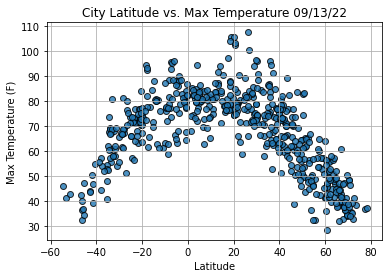

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

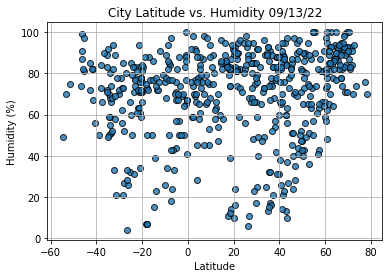

In [19]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

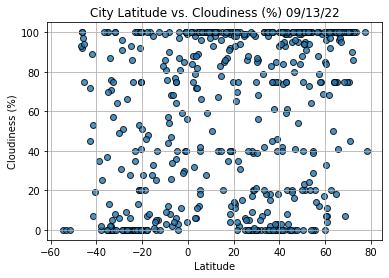

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

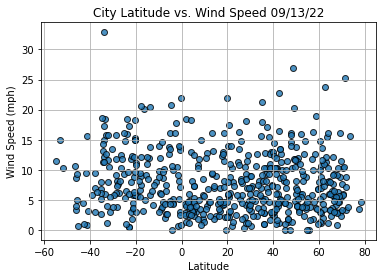

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

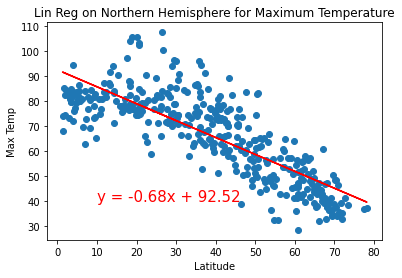

In [25]:
# Linear Regression N hemi

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call reg and plot fn
plot_linear_regression(x_values,
                       y_values,
                       "Lin Reg on Northern Hemisphere for Maximum Temperature",
                       "Max Temp",
                       (10,40))

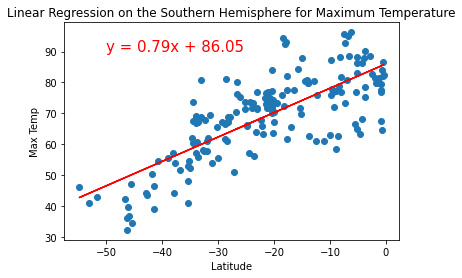

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

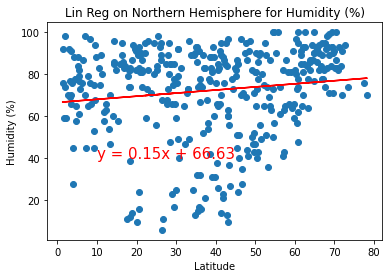

In [28]:
# Linear Regression N hemi

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call reg and plot fn
plot_linear_regression(x_values,
                       y_values,
                       "Lin Reg on Northern Hemisphere for Humidity (%)",
                       "Humidity (%)",
                       (10,40))

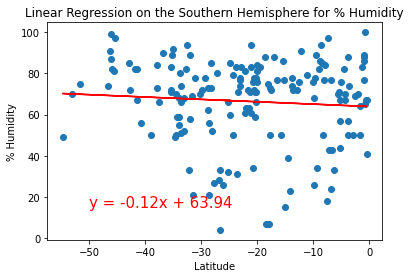

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere ' +
                        'for % Humidity', '% Humidity',(-50,15))

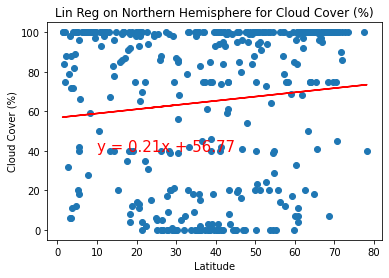

In [32]:
# Linear Regression N hemi

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call reg and plot fn
plot_linear_regression(x_values,
                       y_values,
                       "Lin Reg on Northern Hemisphere for Cloud Cover (%)",
                       "Cloud Cover (%)",
                       (10,40))

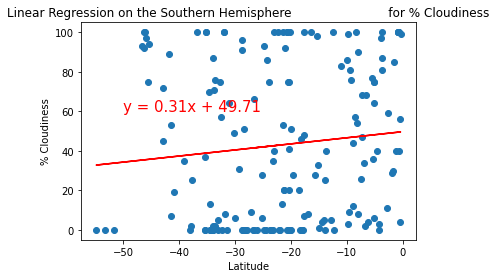

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

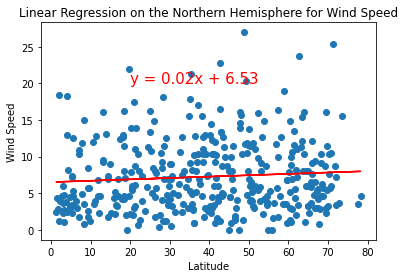

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed',
                       'Wind Speed',(20,20))

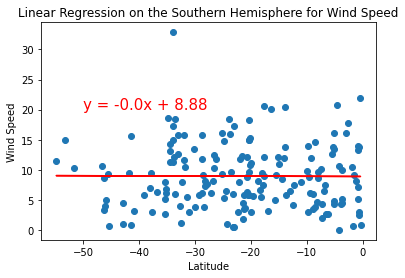

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,20))